# Ibrahim Notebook for Heart_Disease_Prediction 
  ## towards the microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon
  This notebook looks at using machine learning concepts to build a heart disease-predicting model based on medical conditions

## Introduction
This notebook is designed around the creation of a sophisticated predictive model aimed at determining the likelihood of an individual having heart disease. As one of the leading causes of global mortality, detecting heart disease in its early stages is pivotal for enhancing patient outcomes and halting its progression. The conventional diagnostic methods often come with substantial costs and time requirements. Thus, there exists a pressing need for a cutting-edge predictive model that can evaluate the risk of heart disease utilizing easily accessible patient information.

![](dsn_hrt_lg.PNG)

## Objective
The objective is:
- a.) exploring the heart disease dataset using exploratory data analysis (EDA), and
- b.) building a predictive model capable of accurately determining the probability of an individual having heart disease. The focus is leveraging 
machine learning techniques to create a model that can analyze relevant features and provide reliable predictions. The model should demonstrate 
high accuracy and generalizability, ensuring its effectiveness on new, unseen data.

## Significance of Prediction 
Early prediction aids in timely intervention and prevention, optimizing healthcare resources. The cost-effectiveness of predictive models reduces unnecessary procedures, benefiting patients and healthcare systems. Targeted public health efforts can stem from aggregated data, and research also advances through model insights. Ultimately, this challenge addresses a crucial healthcare issue using advanced machine learning, promising improved interventions and better health outcomes.

## Dataset Description

The dataset includes 14 numerical variables. Below are the definitions and descriptions of each variable:

1. **age**: age in years.
2. **sex**: 1 = male, 0 = female.
3. **cp**: chest pain type - 4 values, 0: typical angina, 1: atypical angina, 2: non-anginal pain,  3: asymptomatic.
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital).
5. **chol**: serum cholestoral in mg/dl.
6. **fbs**: fasting blood sugar > 120 mg/dl.
7. **restecg**: resting electrocardiographic results (values 0,1,2).
8. **thalach**: maximum heart rate achieved.
9. **exang**: exercise induced angina (1 = yes, 0 = no).
10. **oldpeak**: ST depression induced by exercise relative to rest.
11. **slope**: the slope of the peak exercise ST segment (0: upsloping,1: flat, 2: downsloping).
12. **ca**: number of major vessels (0-3) colored by flourosopy.
13. **thal**: 0 = normal; 1 = fixed defect; 2 = reversable defect.
14. **target**: have disease or not (1 = yes, 0 = no).
    n   
Understanding these variables is crucial for building an effective model to predict if a patient has heart disease.

### Approach:
The following framework will be followed:
- **Problem Defination**: Given a patient clinical information, is it possible to predict whether the patient has heart disease or not?
- **Data**: Data is provided from [https://zindi.africa/competitions/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon/data]
- **Evaluation**: An excellent accuracy of about 90% will be pursued to help in predicting 
                      whether a patient has heart disease or not
- **Features**: Data dictionary as in the "Data Description" above; represents the different information about each of the features/columns in the data
- **Modeling**:
- **Experimentation**:

### Import tools for libraries:
We be using pandas, NumPy, matplotlib, seaborn for Exploratory Data Analysis (EDA) and Scikit-Learn library for Machine Learning (ML)

In [96]:
# Import Libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")



# Import Models from scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Import Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
train = pd.read_csv("TrainDataset.csv")
test = pd.read_csv("TestDataset.csv")
sample_sub = pd.read_csv("SampleSubmission.csv")


print('Shape of the train_data is ', train.shape)
print('Shape of the test_data is ', test.shape)
print('Shape of the Sample_Submission is ', sample_sub.shape)

Shape of the train_data is  (7303, 15)
Shape of the test_data is  (2697, 14)
Shape of the Sample_Submission is  (2697, 1)


In [3]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [4]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [27]:
test.rename(columns={'id': 'Id', 'age': 'Age', 'sex': 'Sex'}, inplace=True)
test.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [5]:
sample_sub.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


### A. Exploratory Data Analysis (EDA)
Finding out more about the data to understand the features, attributes, and values on the dataset being worked on
Exploring the training data to understand the relationships and distributions of features.

- To consider the questions to solve
- To see the kind of data we have and how to treat the different types 
- To see what's missing from the data and how to handle it
- Check the outliers and how to treat them
- How to add, change or remove features to get more from the data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


#### No missing Values

In [7]:
# Finding out the distribution of target varible
train["target"].value_counts()

target
1    5941
0    1362
Name: count, dtype: int64

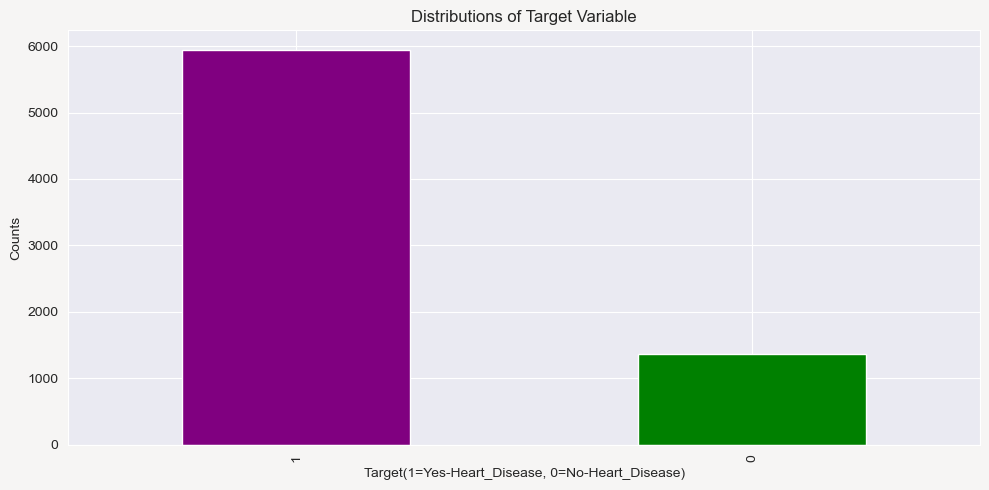

In [8]:
plt.figure(figsize=(10, 5), facecolor='#F6F5F4')

train["target"].value_counts().plot(kind="bar", color = ["purple", "green"])

plt.title("Distributions of Target Variable")
plt.ylabel("Counts")
plt.xlabel("Target(1=Yes-Heart_Disease, 0=No-Heart_Disease)")

#pal_Sel= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.tight_layout()

In [9]:
train.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Univariate Analysis

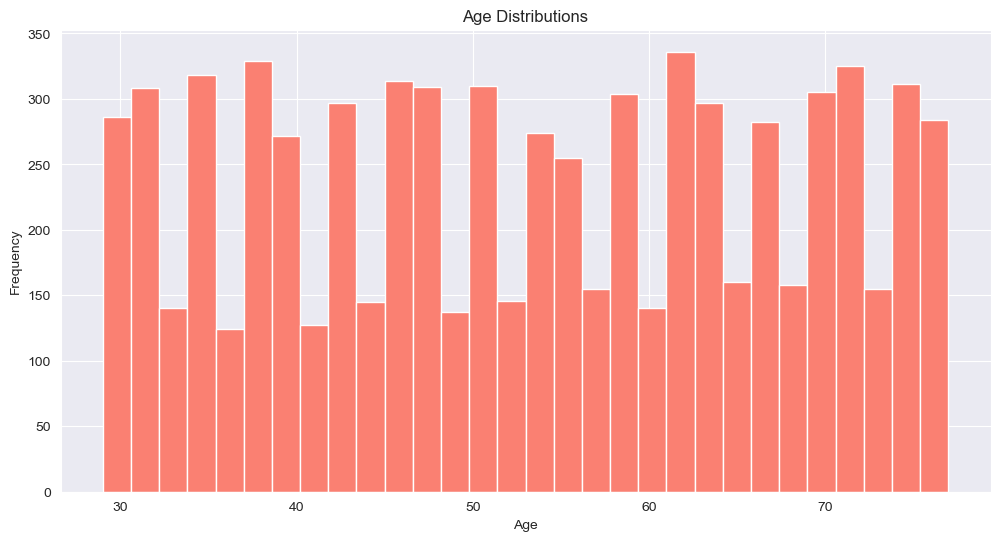

In [10]:
# Age Distributions(Spread of) using Histogram

plt.figure(figsize=(12,6))

train.Age.plot.hist(color = 'salmon', bins = 30)
plt.title('Age Distributions')
plt.ylabel('Frequency')
plt.xlabel('Age')

plt.show()

### Comparing Features
Bivariate Analysis:

In [11]:
train.Sex.value_counts()

Sex
0    3654
1    3649
Name: count, dtype: int64

In [12]:
# Sex and Target Columns Comparison
pd.crosstab(train.target, train.Sex)

Sex,0,1
target,,
0,725,637
1,2929,3012


<Figure size 1200x400 with 0 Axes>

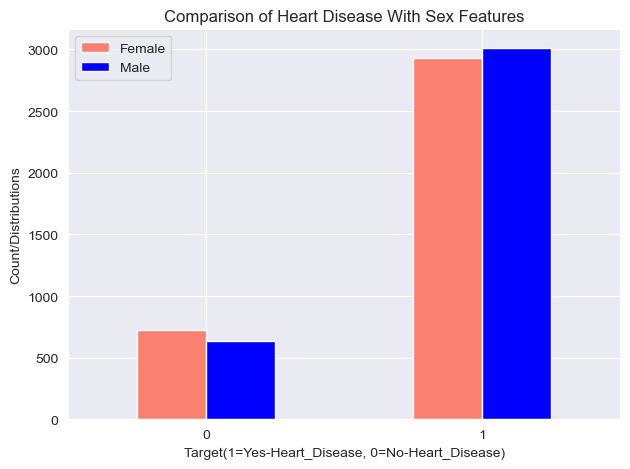

In [13]:
## Plot of the crosstab

plt.figure(figsize=(12, 4), facecolor='#FCD2FC')

pd.crosstab(train.target, train.Sex).plot(kind="bar", color = ["salmon", "blue"])

plt.title("Comparison of Heart Disease With Sex Features")
plt.ylabel("Count/Distributions")
plt.xlabel("Target(1=Yes-Heart_Disease, 0=No-Heart_Disease)")

#pal_Sel= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.legend(["Female", "Male"])
plt.xticks(rotation=0);
plt.tight_layout();
plt.show();

### Observations
- Disease Prevalence: A higher number of males have the disease compared to females.
- No Disease Prevalence: A slightly higher number of females do not have the disease compared to males.

Thus, the data suggests that both males and females have a high prevalence of disease, with males showing a marginally higher number of individuals affected.

In [14]:
train['Age'][train['target']==1]

0       33
2       37
3       75
4       35
6       44
        ..
7297    43
7299    42
7300    51
7301    29
7302    38
Name: Age, Length: 5941, dtype: int64

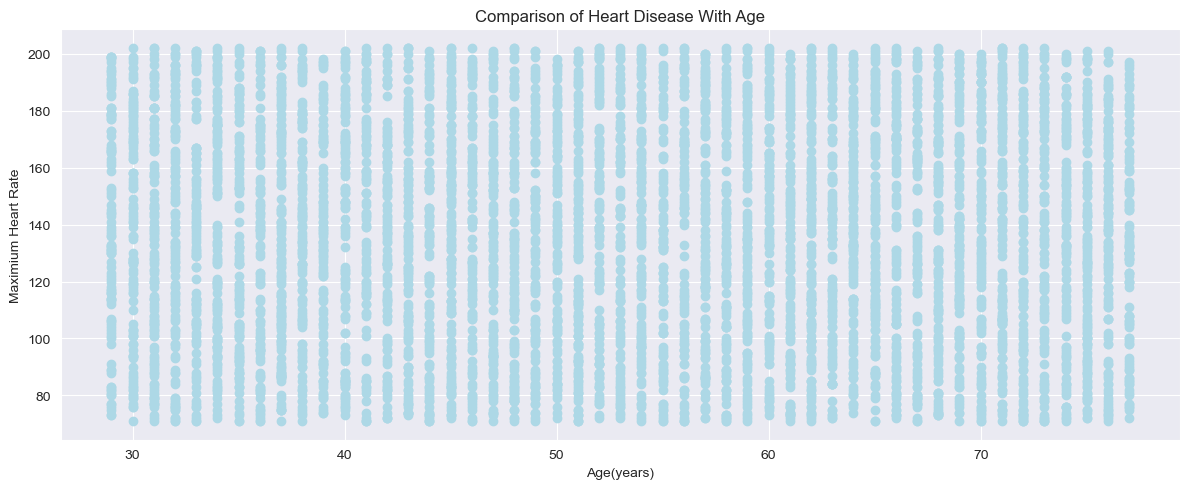

In [15]:
# Thalach: maximum heart rate achieved and Age Columns Comparison

## Scatter plot for positive heart rate

plt.figure(figsize=(12, 5))

plt.scatter(train['Age'][train['target']==1],
           train['thalach'][train['target']==1], color = "lightblue")

plt.title("Comparison of Heart Disease With Age")
plt.ylabel("Maximium Heart Rate")
plt.xlabel("Age(years)")

#pal_Sel= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']


plt.xticks(rotation=0);
plt.tight_layout();
plt.show();

There is no pattern in the distributions for positive heart rate

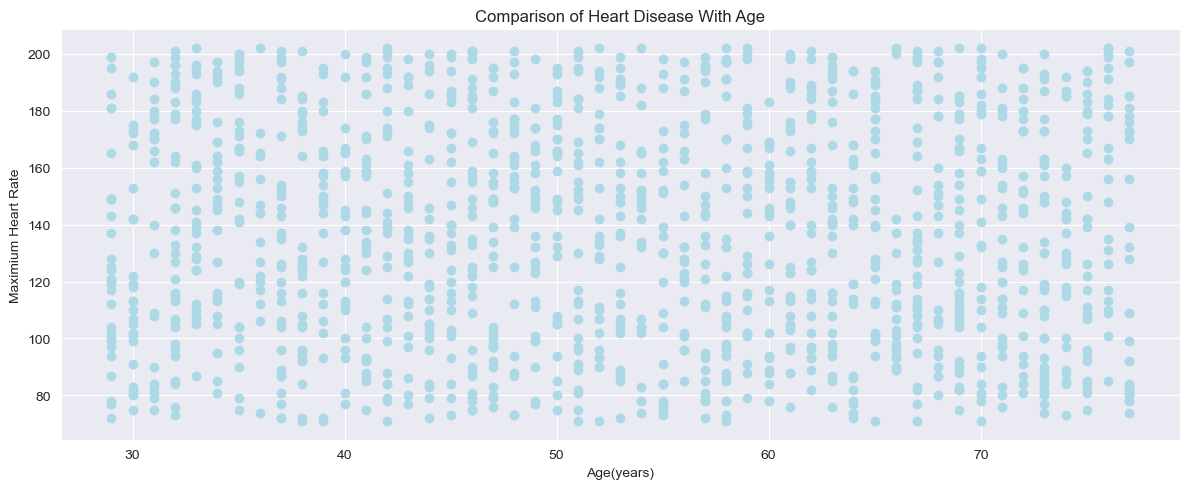

In [22]:
## Scatter plot for negative heart rate

plt.figure(figsize=(12, 5))

plt.scatter(train['Age'][train['target']==0],
           train['thalach'][train['target']==0], color = "lightblue")

plt.title("Comparison of Heart Disease With Age")
plt.ylabel("Maximium Heart Rate")
plt.xlabel("Age(years)")

#pal_Sel= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']


plt.xticks(rotation=0);
plt.tight_layout();
plt.show();

There is no pattern in the distributions  for negative heart rate

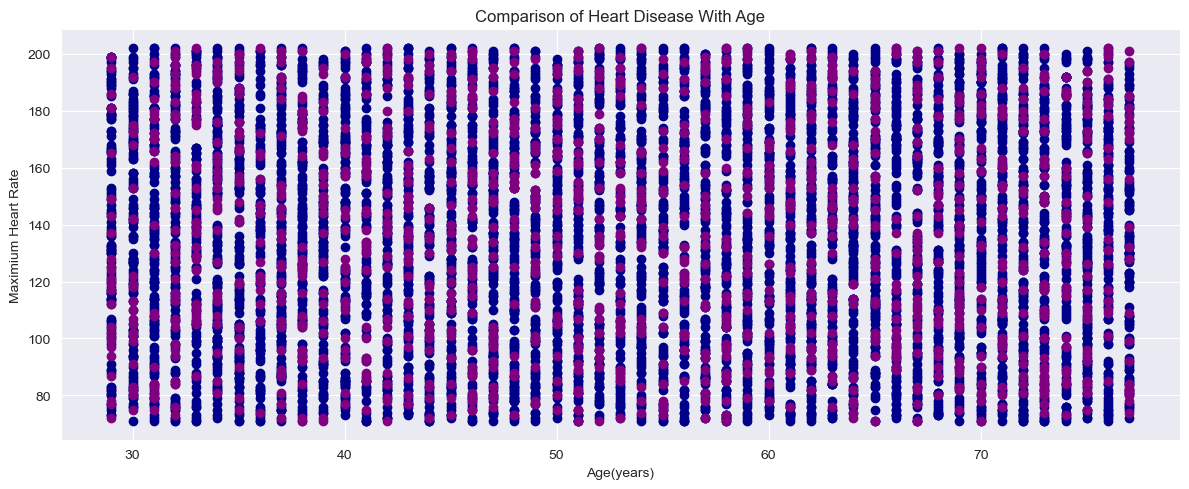

In [16]:
## Scatter plot for both positive and negative heart rate combined

plt.figure(figsize=(12, 5))

plt.scatter(train['Age'][train['target']==1],
           train['thalach'][train['target']==1], color = "darkblue")

plt.scatter(train['Age'][train['target']==0],
           train['thalach'][train['target']==0], color = "purple")

plt.title("Comparison of Heart Disease With Age")
plt.ylabel("Maximium Heart Rate")
plt.xlabel("Age(years)")

#pal_Sel= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']


plt.xticks(rotation=0);
plt.tight_layout();
plt.show();

No patterns for both positive and negative heart rate combined scatter plot

In [17]:
# Heart Disease Frequency per chest pain type

pd.crosstab(train.cp, train.target)

target,0,1
cp,,
0,0,1802
1,480,1378
2,451,1363
3,431,1398


### Stacked bars to show the proportion of people with and without heart disease for each cp.

We use a stacked bar plot to help visualize this comparison:

- X-axis: cp (chest pain type)
- Y-axis: Total number of people
  
Use stacked bars to show the proportion of people with and without heart disease for each cp.

<Figure size 1200x500 with 0 Axes>

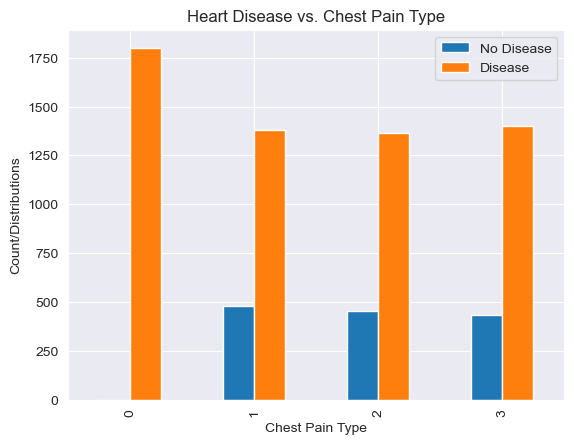

In [18]:
# Bar Plot 

plt.figure(figsize=(12, 5))
bar_width = 0.35


# Stacked bar chart
pd.crosstab(train.cp, train.target).plot(kind="bar")

#cp_types = ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']

# Labels and title
plt.xlabel('Chest Pain Type')
plt.ylabel('Count/Distributions')
plt.title('Heart Disease vs. Chest Pain Type')

plt.legend(["No Disease", "Disease"])

# Show the plot
plt.show()

### Interpretation:
cp = 0 (Typical Angina): Everyone with typical angina in the data set is disease-free.

cp = 1 (Atypical Angina), cp = 2 (Non-anginal Pain), cp = 3 (Asymptomatic): For all these chest pain types, the majority (over 70%) have heart disease, with asymptomatic individuals having the highest percentage (76.4%) of disease presence.

This suggests that people with atypical angina, non-anginal pain, or asymptomatic chest pain are more likely to have heart disease compared to people with typical angina (who show no heart disease in this data).


This analysis shows that chest pain type plays a significant role in predicting heart disease. While typical angina seems to be more common among people without heart disease, atypical angina, non-anginal pain, and asymptomatic individuals have a higher likelihood of having heart disease, especially for those in the asymptomatic category.

<Figure size 1200x400 with 0 Axes>

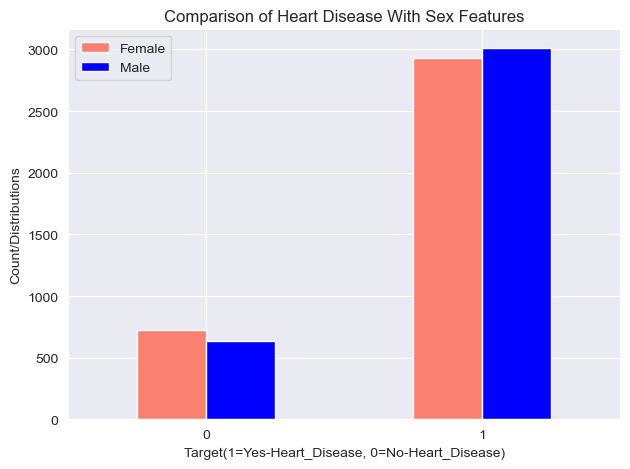

In [19]:
## Plot of the crosstab

plt.figure(figsize=(12, 4), facecolor='#FCD2FC')

pd.crosstab(train.target, train.Sex).plot(kind="bar", color = ["salmon", "blue"])

plt.title("Comparison of Heart Disease With Sex Features")
plt.ylabel("Count/Distributions")
plt.xlabel("Target(1=Yes-Heart_Disease, 0=No-Heart_Disease)")

#pal_Sel= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.legend(["Female", "Male"])
plt.xticks(rotation=0);
plt.tight_layout();
plt.show();

### Finding Patterns Using Correlation Matrix:

In [20]:
## Correlation Matrix
train.corr()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Id,1.000000,-0.007837,0.002818,-0.018952,-0.016580,0.015200,-0.023790,0.001488,-0.012959,0.001735,0.004434,0.000617,0.033008,-0.000420,0.006148
Age,-0.007837,1.000000,0.002335,-0.001771,-0.022767,0.004541,0.012960,-0.002644,0.000204,0.001495,0.007193,-0.004480,0.013257,0.002313,-0.002846
Sex,0.002818,0.002335,1.000000,-0.030134,0.002793,-0.007434,-0.017675,-0.003850,-0.006331,0.027802,-0.004897,0.000663,0.010203,0.003261,0.030608
cp,-0.018952,-0.001771,-0.030134,1.000000,0.011924,0.024823,-0.016848,0.001544,0.019503,0.009621,0.000942,-0.009439,0.013676,-0.009296,-0.198082
trestbps,-0.016580,-0.022767,0.002793,0.011924,1.000000,-0.003238,0.003757,0.010334,0.001575,0.021449,0.011277,0.001750,-0.009947,0.005632,0.009320
chol,0.015200,0.004541,-0.007434,0.024823,-0.003238,1.000000,0.006588,0.003218,-0.014182,-0.006674,-0.003930,-0.013061,0.007788,0.011114,-0.012291
fbs,-0.023790,0.012960,-0.017675,-0.016848,0.003757,0.006588,1.000000,-0.002298,0.005419,0.010908,0.004803,0.000191,0.001255,-0.006554,0.003925
restecg,0.001488,-0.002644,-0.003850,0.001544,0.010334,0.003218,-0.002298,1.000000,-0.004714,-0.000270,0.017644,0.015365,0.003593,-0.007497,0.005911
thalach,-0.012959,0.000204,-0.006331,0.019503,0.001575,-0.014182,0.005419,-0.004714,1.000000,0.019037,0.012347,-0.010617,0.004899,0.007943,-0.004634
exang,0.001735,0.001495,0.027802,0.009621,0.021449,-0.006674,0.010908,-0.000270,0.019037,1.000000,0.018074,0.005094,-0.012028,0.010875,0.481897


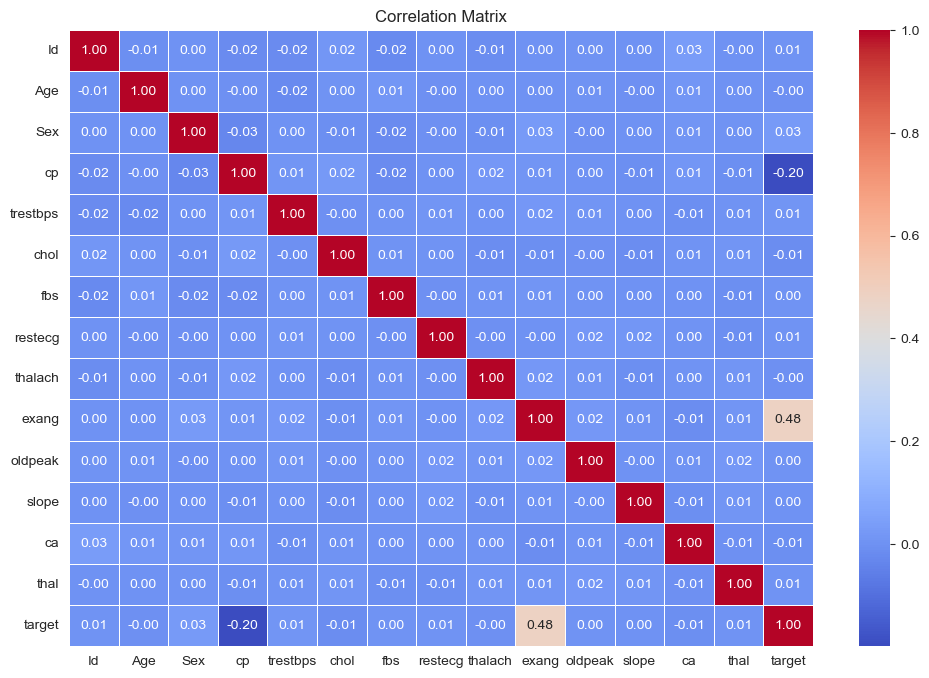

In [21]:
## Heatmap Plot for correlation matrix #Color YlGnBu

plt.figure(figsize=(12, 8))

corr = train.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths = 0.5, fmt=".2f")
plt.title('Correlation Matrix')

plt.show();

From the given correlation matrix and Heatmap, we can observe the relationships between various features (variables) in the dataset. 

Here is the break down of some important patterns:

## Key patterns to note:

**Strong positive correlation**:

`Target and Exang (0.481897)`: This suggests that exercise-induced angina (exang) is strongly correlated with the presence of heart disease (target = 1). People who experience exercise-induced angina are more likely to have heart disease.

**Strong negative correlation**:

`Target and cp (-0.198082)`: Chest pain type (cp) is negatively correlated with the presence of heart disease. The negative value suggests that higher values of chest pain (asymptomatic, non-anginal pain, etc.) may indicate a lower likelihood of having heart disease.

**Weak correlations**:

Most of the other features show very weak correlations with the target variable or with each other. These weak correlations suggest that no strong linear relationship exists between these features and the target or amongst themselves.

### Feature Interactions:
`Chest Pain Type (cp) and Target`:

The negative correlation between chest pain type and target suggests that certain chest pain types (likely asymptomatic types) reduce the likelihood of heart disease diagnosis.

`Exercise-Induced Angina (exang) and Target`:

The high positive correlation between exercise-induced angina (exang) and target shows a strong association. People who experience this type of angina are more likely to be diagnosed with heart disease.

`Other features such as Age, Sex, Cholesterol (chol), and Resting Blood Pressure (trestbps)`:

These features have relatively low correlation values with target, meaning that in this dataset, they might not have a significant direct impact on predicting heart disease alone. However, they might contribute to the overall predictive model in combination with other factors.

**Feature Relationships**:

`Cholesterol (chol) and other features`:
Cholesterol has a weak negative correlation with chest pain (cp) (-0.012291) and a weak positive correlation with fasting blood sugar (fbs) (0.006588). This indicates that cholesterol levels do not show a strong direct relationship with either chest pain type or blood sugar levels in this dataset.

`Resting Blood Pressure (trestbps) and Age`:
The weak negative correlation (-0.022767) between trestbps and age suggests that in this dataset, blood pressure does not increase significantly with age.

**Conclusion**:
The most notable insights from this matrix are the strong relationships between exercise-induced angina (exang) and heart disease (target), and the negative correlation between chest pain type (cp) and heart disease (target). These patterns can help inform feature selection for predictive modeling or further analysis.







## B. Data Preprocessing
Preprocess the data before feeding it into the model. This includes handling missing values, encoding categorical variables, and feature scaling.

In [24]:
# Dropping target variable from training data
trainT = train['target']
train = train.drop('target', axis=1)

In [28]:
# Combine train and test data for uniform preprocessing
train_test = pd.concat([train, test], sort=False)
train_test.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0


In [29]:
len(train_test)

10000

In [30]:
# Check for missing values
missing_values = train_test.isnull().sum()
missing_values

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

No Missing Values

In [31]:
# Drop the 'Id' as it is not useful for the model
train_test = train_test.drop('Id', axis=1)

In [33]:
# Split the combined data back into train and test sets
train = train_test.iloc[:len(trainT), :]
test = train_test.iloc[len(trainT):, :]

In [34]:
len(train)

7303

In [35]:
len(test)

2697

## C. i.) Modeling:-Model Building
To predict independent variable

In [ ]:
# split data into X and y
train = train.drop('target', axis=1) # This is X
trainT = train['target'] #This is y

In [38]:
# X
train

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,33,0,1,158,205,1,0,154,0,1.5,1,4,1
1,53,1,2,198,154,0,1,104,0,0.8,2,1,0
2,37,1,2,101,202,1,0,155,0,2.1,1,3,1
3,75,0,0,113,306,1,2,88,1,4.9,0,2,2
4,35,1,2,139,419,1,1,166,1,0.9,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,30,1,2,107,177,1,2,119,0,2.7,1,0,0
7299,42,1,2,96,551,1,2,76,0,1.9,2,3,2
7300,51,1,0,151,165,1,0,190,1,0.9,0,0,2
7301,29,0,0,195,287,1,2,161,1,3.4,1,1,0


In [39]:
# y
trainT

0       1
1       0
2       1
3       1
4       1
       ..
7298    0
7299    1
7300    1
7301    1
7302    1
Name: target, Length: 7303, dtype: int64

In [43]:
# Split train-Data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(train,
                                                   trainT,
                                                   test_size=0.2)

In [44]:
X_train

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
565,64,0,2,196,337,1,0,109,1,1.8,0,2,0
2716,74,0,3,129,302,1,0,137,0,0.4,0,1,2
3859,54,1,1,146,218,0,1,200,1,0.5,0,4,3
640,50,0,0,191,398,1,0,107,0,0.1,0,3,0
3480,46,0,3,132,505,1,2,90,0,3.9,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,47,1,3,113,445,0,2,146,0,0.4,1,4,1
5226,69,1,1,199,174,1,2,85,0,6.1,2,0,1
5390,36,1,1,173,453,1,2,106,0,1.5,2,1,3
860,77,1,1,172,296,1,2,82,0,4.3,0,2,1


In [45]:
X_test

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
2405,63,0,3,144,211,0,1,150,0,0.8,0,1,2
2083,57,0,2,122,306,1,0,129,1,4.5,1,3,1
3858,30,0,3,140,484,1,0,181,1,4.3,2,2,0
1918,62,1,1,95,439,1,0,99,0,0.4,2,0,3
6780,36,0,3,175,317,0,0,82,1,3.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,49,0,0,173,294,1,1,143,1,1.7,0,2,0
4387,54,1,0,145,284,0,0,146,0,3.5,0,0,1
527,30,0,0,140,443,0,0,163,1,0.7,0,4,0
1783,61,1,2,154,358,0,1,124,0,4.3,0,0,2


In [46]:
y_train

565     1
2716    0
3859    1
640     1
3480    0
       ..
5191    1
5226    1
5390    1
860     0
7270    1
Name: target, Length: 5842, dtype: int64

In [47]:
y_test

2405    0
2083    1
3858    1
1918    1
6780    1
       ..
5015    1
4387    1
527     1
1783    1
6480    0
Name: target, Length: 1461, dtype: int64

Data is now split into traing and test set, going ahead to train and find patterns on the training set and then test to find patterns on the test set

Trying different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest Classifierder
import shap

In [50]:
# Models in dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """Fitting and evaluating selected machine learning models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set Random Seed
    np.random.seed(42)

    # Create dictionary to keep model scores
    model_scores = {}
    # Loop through models

    for name, model in models.items():
        # fit model to data
        model.fit(X_train, y_train)
        #Evaluate model and append score to mmodel_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

## C. ii.) Modeling:-Model Evaluation

In [51]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8193018480492813,
 'KNN': 0.7891854893908282,
 'Random Forest': 0.8151950718685832}

 ### Model Comparison

<Figure size 1200x500 with 0 Axes>

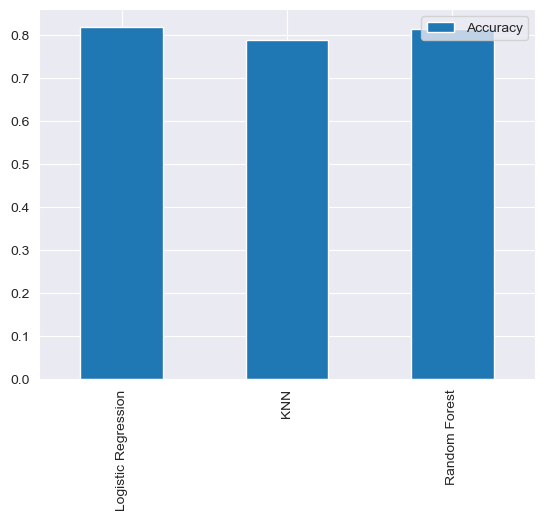

In [58]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])

plt.figure(figsize=(12, 5))
bar_width = 0.35

model_compare.T.plot.bar();

The Baseline Model has been gotten, although they are not what we want, next steps
Consider the following

* Hyperparameter tuning - Always almost part of ML
* Feature Importance  - Always almost part of ML 
* Confusion Matrix
* Cross_validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

### Experimentation

### Hyperparameter tuning

In [65]:
# Tune KNN; to improve the baseline score
np.random.seed(42)
train_scores = []
test_scores = []

# Create different values 
neighbors = range(1, 21)

# Set KNN instance
knn = KNeighborsClassifier()

# Loop through n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit algorithm
    knn.fit(X_train, y_train)
    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))
    # Update test scores listabs
    test_scores.append(knn.score(X_test, y_test))

In [66]:
train_scores

[1.0,
 0.8474837384457378,
 0.8423485107839781,
 0.8154741526874358,
 0.8147894556658678,
 0.8106812735364601,
 0.8132488873673399,
 0.8110236220472441,
 0.812221841834988,
 0.812221841834988,
 0.8123930160903801,
 0.812221841834988,
 0.8115371448134201,
 0.812735364601164,
 0.812050667579596,
 0.812735364601164,
 0.812564190345772,
 0.811708319068812,
 0.812564190345772,
 0.8118794933242041]

In [67]:
test_scores

[0.7125256673511293,
 0.6119096509240246,
 0.7713894592744696,
 0.7221081451060917,
 0.7891854893908282,
 0.7727583846680356,
 0.8056125941136209,
 0.7946611909650924,
 0.8151950718685832,
 0.8090349075975359,
 0.8193018480492813,
 0.8165639972621492,
 0.8186173853524983,
 0.8179329226557153,
 0.8206707734428473,
 0.8179329226557153,
 0.8213552361396304,
 0.8213552361396304,
 0.8213552361396304,
 0.8206707734428473]

Maximium KNN score on the test data: 82.14%


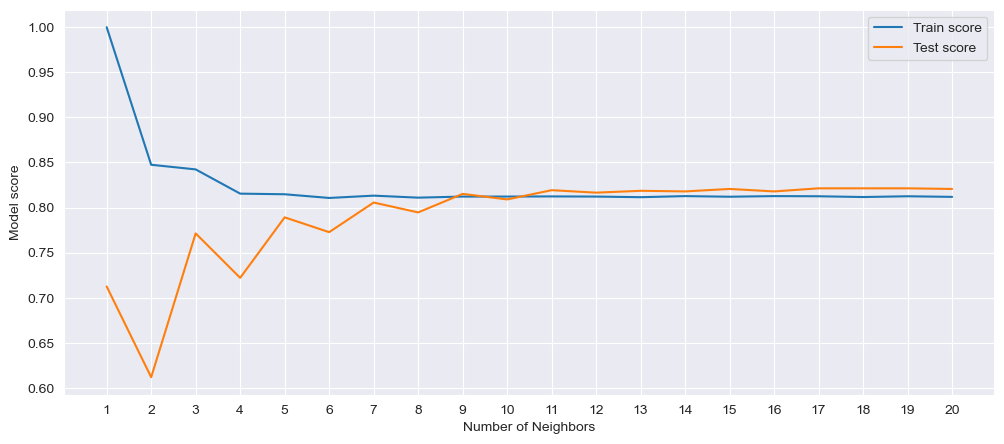

In [69]:
plt.figure(figsize=(12, 5))

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()

print(f"Maximium KNN score on the test data: {max(test_scores)*100:.2f}%")

Model score still far below the expected score

In [ ]:
# Tuning Logistic Regression and Random Forest Classifier as combinations using RandomizedSearchCV


LogisticRegression(),
RandomForestClassifier()}

In [79]:
# Create hypaparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                 "solver": ["liblinear"]}

## Create hypaparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

We have the hyper parameter grids for each of LogisticRegression() and RandomForestClassifier(), we tune using RandomizedSearchCV

In [73]:
# Tune LogisticRegression()
np.random.seed(42)

# Set random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                                cv=5,
                               n_iter=20,
                                verbose =True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [74]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.012742749857031334}

In [75]:
rs_log_reg.score(X_test, y_test)

0.8227241615331964

In [80]:
# Tune RandomForestClassifier
np.random.seed(42)

# Set random hyperrarameter Search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                          verbose=True)

# Fit random hyperrarameter Search for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [81]:
# Find best hyperparameters
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [82]:
# Evaluate the randomixed search RandomForestClassifier
rs_rf.score(X_test, y_test)

0.8165639972621492

#### Use GridSearchCV with LogisticRegression to tune Hyperparameters
- Notice LogisticRegression has provided the best score so far

In [85]:
# Different Hypeparameters for LogisticRegression Model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Set grid hyperparamete search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [86]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [87]:
# Evaluate grid Seacrh LogisticRegression
gs_log_reg.score(X_test, y_test)

0.8254620123203286

## Evaluate Tuned Machine Learning Classifier beyond accuracy

* ROC Curve
* * * * * * * 
* 
  TO make comparisons and evalyuate trained modelohe t; make predictions

In [89]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [90]:
y_preds

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [92]:
y_test

2405    0
2083    1
3858    1
1918    1
6780    1
       ..
5015    1
4387    1
527     1
1783    1
6480    0
Name: target, Length: 1461, dtype: int64

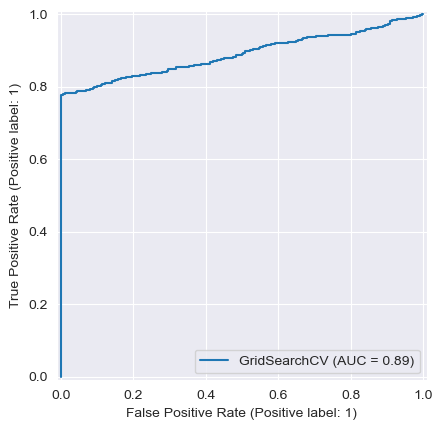

In [98]:
# Plot ROC curve and calculate AUC metric

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [94]:
confusion_matrix(y_test, y_preds)

array([[  84,  176],
       [  79, 1122]], dtype=int64)

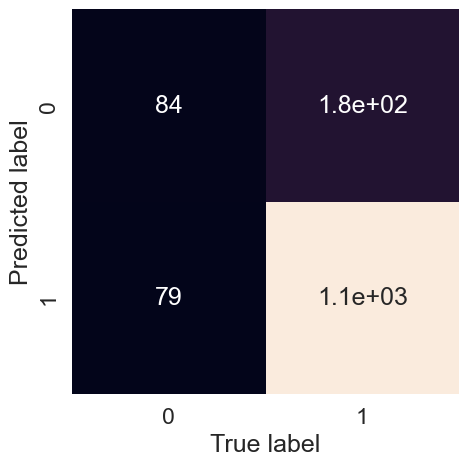

In [105]:
sns.set(font_scale=1.5) 

def plot_conf_mat(y_test, y_preds):
    """
    Using Seaborn's heatmap to plot confusion matrix
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test, y_preds)

Get classification report as well as cross-validation, precision, recall and f1-score

In [107]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.52      0.32      0.40       260
           1       0.86      0.93      0.90      1201

    accuracy                           0.83      1461
   macro avg       0.69      0.63      0.65      1461
weighted avg       0.80      0.83      0.81      1461



Calculate Evaluation metrics using `cross-validation` for precision, recall and f1-score

In [108]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [128]:
# Create new classifier with best parameters
clf = LogisticRegression(C=17.433288221999874,
                        solver="liblinear")

In [129]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                      train, # X
                      trainT,# y
                      cv=5,
                      scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8133653999418676

In [130]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                      train, # X
                      trainT,# y
                      cv=5,
                      scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8554349421549983

In [131]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                      train, # X
                      trainT,# y
                      cv=5,
                      scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272857535262918

In [122]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                      train, # X
                      trainT,# y
                      cv=5,
                      scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8900591941523516

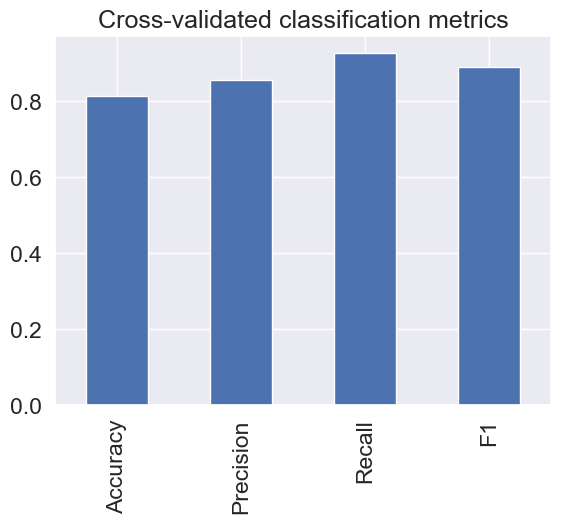

In [132]:
# Visualize cross-Validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

#### Feature Importance: 
Check which features contributed to the outcome of the model and how they contributed to the model

Note: To get feature importance its different for each machine learning model; Always search for `Model Name` - feature importance
Get Feature inportance for LogLogisticRegression model...

In [134]:
# Get best params

gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [137]:
# Fit instance of LogisticRegression
clf = LogisticRegression(C=17.433288221999874,
                        solver = "liblinear")

clf.fit(X_train, y_train);

In [138]:
clf.coef_

array([[ 8.58430740e-06,  8.40897008e-02, -6.55951574e-01,
        -3.49926904e-04,  4.55096399e-05, -4.73572315e-02,
         1.44427409e-02, -1.19713564e-03,  6.31490009e+00,
        -1.59743060e-02, -1.51063014e-02,  2.34917658e-02,
        -9.95318206e-03]])

In [140]:
# Match coef's of features to columns
feature_dict = dict(zip(train.columns, list(clf.coef_[0])))
feature_dict

{'Age': 8.584307402547645e-06,
 'Sex': 0.08408970081286662,
 'cp': -0.6559515739590224,
 'trestbps': -0.0003499269038469495,
 'chol': 4.550963985471481e-05,
 'fbs': -0.04735723151642032,
 'restecg': 0.014442740896592391,
 'thalach': -0.0011971356395416711,
 'exang': 6.314900089599529,
 'oldpeak': -0.015974305986426317,
 'slope': -0.015106301363548576,
 'ca': 0.023491765759107854,
 'thal': -0.009953182061082212}

clf.coef_ an attribute of classifier mapped to the right columns in the main dataframe train data, showing how much and in what way each is contributing to the prediction of the target variable.

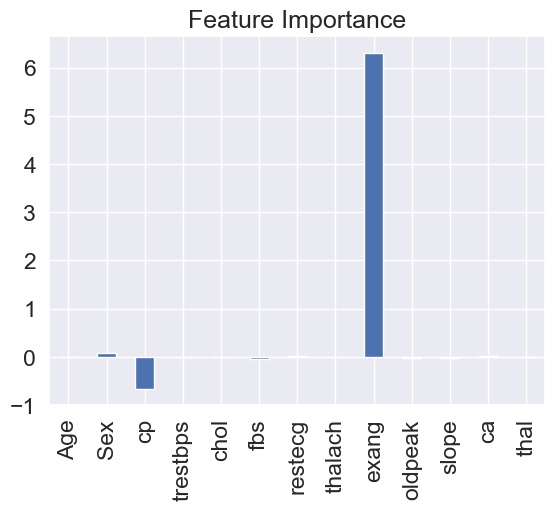

In [143]:
# Visualize feature importance
feature_train = pd.DataFrame(feature_dict, index=[0])
feature_train.T.plot.bar(title="Feature Importance", legend=False);

##### feature importance visual above show the contribution of each features to the prediction.
Its a model driven exploratory data analysis

cp is negative, exang is positive, sex is a low positive

In [ ]:
pd.crosstab(train["Sex"], train["target"])

* Consider data:
* Try other models
* improve the current model
* If model is good with evaluation metrics, export and share with others

import pickle
s = pickle.dump()
clf = pickle.loads(s)
clf.predict()

 ## D.  Making Predictions on Test Data

In [148]:
# Making predictions on the test data set and preparing the submission file.
predictions = gs_log_reg.predict(test)
baseline_sub = sample_sub.copy()
baseline_sub['target'] = predictions
baseline_sub.to_csv('Ibrahim_accuracy_submission_HeartDisease.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()

,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0
